In [3]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.windows import Window

class RasterViewer:
    def __init__(self, raster_path):
        self.dataset = rasterio.open(raster_path)
        self.current_band_combination = [1]  # Adjust for the number of bands in your raster to avoid error.
        self.current_window = Window(0, 0, self.dataset.width, self.dataset.height)

    def load_and_display_raster(self):
        raster_data = self.dataset.read(self.current_band_combination, window=self.current_window)
        plt.imshow(raster_data.transpose((1, 2, 0)))
        plt.title("Raster Viewer")
        plt.show()

    def change_band_combination(self, bands):
        self.current_band_combination = bands
        self.load_and_display_raster()

    def zoom(self, factor):
        new_width = int(self.dataset.width / factor)
        new_height = int(self.dataset.height / factor)

        new_width = min(new_width, self.dataset.width)
        new_height = min(new_height, self.dataset.height)

        self.current_window = Window(self.current_window.col_off, self.current_window.row_off, new_width, new_height)
        self.load_and_display_raster()

    def pan(self, direction):
        new_col_off = self.current_window.col_off + direction[0]
        new_row_off = self.current_window.row_off + direction[1]

        new_col_off = max(0, min(new_col_off, self.dataset.width - self.current_window.width))
        new_row_off = max(0, min(new_row_off, self.dataset.height - self.current_window.height))

        self.current_window = Window(new_col_off, new_row_off, self.current_window.width, self.current_window.height)
        self.load_and_display_raster()

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

class ShapefileAnalyzer:
    def __init__(self, shapefile_path):
        self.shapefile_data = gpd.read_file(shapefile_path)

    def plot_attribute_data(self, attribute_column):
        plt.bar(self.shapefile_data.index, self.shapefile_data[attribute_column])
        plt.title(f"{attribute_column} Distribution")
        plt.show()

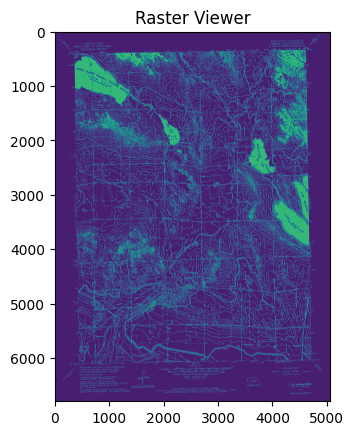

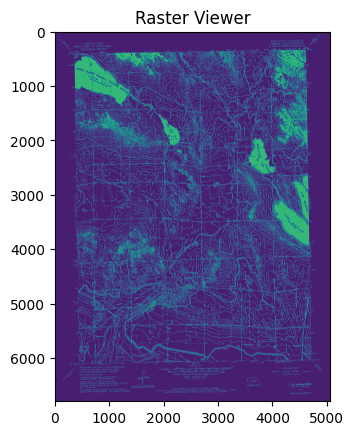

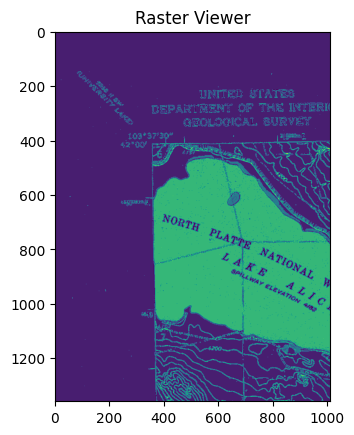

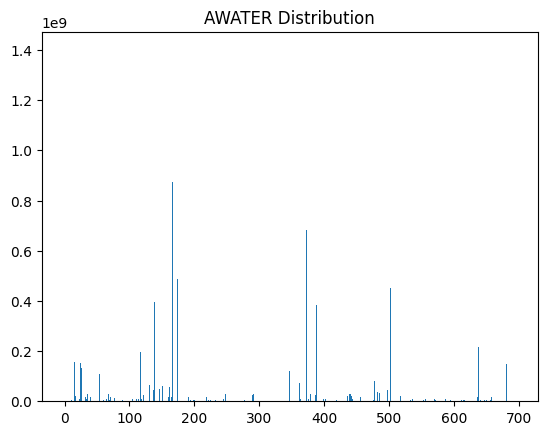

In [6]:
raster_path = "C:\\Users\\vijet\\OneDrive\\Desktop\\My Project\\Basic Raster Viewer\\raster-viewer-shapefile-analyzer\\raster-viewer\\LAKE_ALICE.tif"
shapefile_path = "C:\\Users\\vijet\\OneDrive\\Desktop\\My Project\\Basic Raster Viewer\\raster-viewer-shapefile-analyzer\\raster-viewer\\cb_2018_us_aiannh_500k.shp"

raster_viewer = RasterViewer(raster_path)
raster_viewer.load_and_display_raster()

raster_viewer.pan((1000, 4000))

raster_viewer.zoom(5)

shapefile_analyzer = ShapefileAnalyzer(shapefile_path)
attribute_column_to_plot = "AWATER"  # Adjust to the desired attribute column in your shapefile. Check your columns and select the column to wish to analyze.
shapefile_analyzer.plot_attribute_data(attribute_column_to_plot)